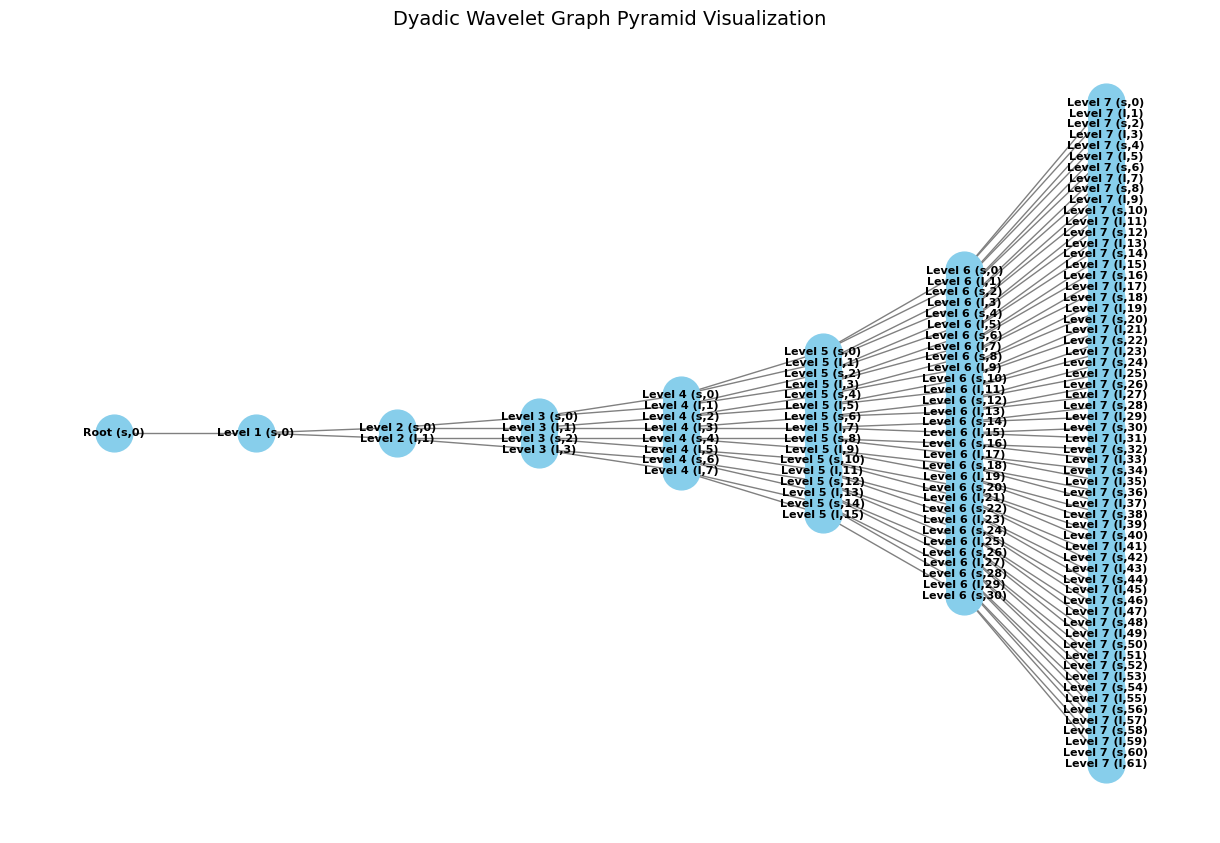

In [31]:
import torch
import networkx as nx
import torch_geometric
from torch_geometric.data import Data
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal
np.random.seed(42)
signal = np.sin(2 * np.pi * 10 * np.linspace(0, 1, 124)) + np.random.normal(0, 0.2, 124)

# Perform wavelet decomposition
wavelet = 'db1'
coeffs = pywt.wavedec(signal, wavelet, level=7)

# Prepare graph data
def build_dyadic_wavelet_graph(coeffs):
    """
    Build a dyadic graph from wavelet decomposition coefficients.
    Each node at level n is connected to two nodes at level n+1.
    Add coefficient indices for detailed representation.
    """
    max_length = max(len(c) for c in coeffs)  # Determine max length of coefficient arrays
    node_features = []  # To store node features
    edges = []  # To store edges
    node_labels = {}  # To label nodes for visualization
    node_levels = {}  # To store levels for layout

    current_node = 0  # Node counter

    # Add root node (original signal approximation)
    root_feature = np.pad(coeffs[0], (0, max_length - len(coeffs[0])), mode='constant')
    node_features.append(root_feature.tolist())
    node_labels[current_node] = "Root (s,0)"
    node_levels[current_node] = 0

    parent_nodes = [current_node]  # Track parent nodes for dyadic connections
    current_node += 1

    # Process detail coefficients for wavelet levels
    for level, c in enumerate(coeffs[1:], start=1):
        new_parent_nodes = []  # Track new parent nodes for the next level
        for parent in parent_nodes:
            # Each parent connects to two children
            for i in range(2):
                if len(c) > 2 * (parent - parent_nodes[0]) + i:  # Check if index is within bounds
                    coeff_index = 2 * (parent - parent_nodes[0]) + i
                    padded_feature = np.pad([c[coeff_index]],
                                            (0, max_length - 1), mode='constant')
                    node_features.append(padded_feature.tolist())
                    s_or_l = "s" if i == 0 else "l"  # Determine short (s) or long (l) connection
                    node_labels[current_node] = f"Level {level} ({s_or_l},{coeff_index})"
                    node_levels[current_node] = level
                    edges.append([parent, current_node])  # Add edge
                    new_parent_nodes.append(current_node)
                    current_node += 1
        parent_nodes = new_parent_nodes  # Update parent nodes for next level

    # Convert to PyTorch tensors
    x = torch.tensor(node_features, dtype=torch.float)
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

    return Data(x=x, edge_index=edge_index), node_labels, node_levels

# Build the dyadic wavelet graph
wavelet_graph, node_labels, node_levels = build_dyadic_wavelet_graph(coeffs)

# Convert to NetworkX for visualization
g = torch_geometric.utils.to_networkx(wavelet_graph, to_undirected=True)

# Draw the graph with improved visualization
def draw_dyadic_wavelet_graph_pyramid(g, node_labels, node_levels):
    plt.figure(figsize=(12, 8))
    for node, level in node_levels.items():
        g.nodes[node]['subset'] = level  # Add subset information for each node
    pos = nx.multipartite_layout(g, subset_key='subset')  # Arrange in levels
    nx.draw(
        g, pos, with_labels=True, labels=node_labels,
        node_size=700, node_color="skyblue", font_size=8, font_weight="bold", edge_color="gray"
    )
    plt.title("Dyadic Wavelet Graph Pyramid Visualization", fontsize=14)
    plt.show()

# Visualize the wavelet graph as a pyramid
draw_dyadic_wavelet_graph_pyramid(g, node_labels, node_levels)


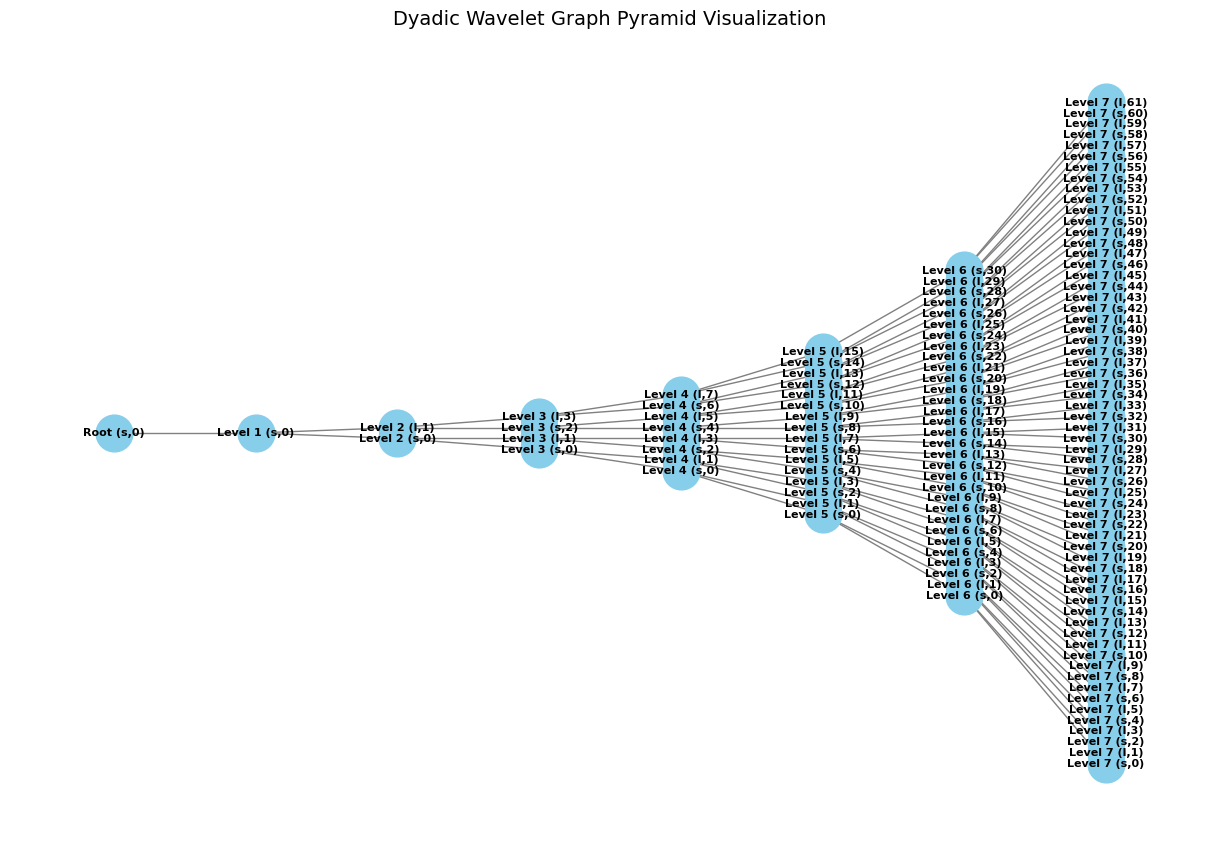

In [33]:
import torch
import networkx as nx
import torch_geometric
from torch_geometric.data import Data
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal
np.random.seed(42)
signal = np.sin(2 * np.pi * 10 * np.linspace(0, 1, 124)) + np.random.normal(0, 0.2, 124)

# Perform wavelet decomposition
wavelet = 'db1'
coeffs = pywt.wavedec(signal, wavelet, level=7)

# Prepare graph data
def build_dyadic_wavelet_graph(coeffs):
    """
    Build a dyadic graph from wavelet decomposition coefficients.
    Each node at level n is connected to two nodes at level n+1.
    Add coefficient indices for detailed representation.
    """
    max_length = max(len(c) for c in coeffs)  # Determine max length of coefficient arrays
    node_features = []  # To store node features
    edges = []  # To store edges
    node_labels = {}  # To label nodes for visualization
    node_levels = {}  # To store levels for layout

    current_node = 0  # Node counter

    # Add root node (original signal approximation)
    root_feature = np.pad(coeffs[0], (0, max_length - len(coeffs[0])), mode='constant')
    node_features.append(root_feature.tolist())
    node_labels[current_node] = "Root (s,0)"
    node_levels[current_node] = 0

    parent_nodes = [current_node]  # Track parent nodes for dyadic connections
    current_node += 1

    # Process detail coefficients for wavelet levels
    for level, c in enumerate(coeffs[1:], start=1):
        new_parent_nodes = []  # Track new parent nodes for the next level
        for parent in parent_nodes:
            # Each parent connects to two children
            for i in range(2):
                if len(c) > 2 * (parent - parent_nodes[0]) + i:  # Check if index is within bounds
                    coeff_index = 2 * (parent - parent_nodes[0]) + i
                    padded_feature = np.pad([c[coeff_index]],
                                            (0, max_length - 1), mode='constant')
                    node_features.append(padded_feature.tolist())
                    s_or_l = "s" if i == 0 else "l"  # Determine short (s) or long (l) connection
                    node_labels[current_node] = f"Level {level} ({s_or_l},{coeff_index})"
                    node_levels[current_node] = level
                    edges.append([parent, current_node])  # Add edge
                    new_parent_nodes.append(current_node)
                    current_node += 1
        parent_nodes = new_parent_nodes  # Update parent nodes for next level

    # Convert to PyTorch tensors
    x = torch.tensor(node_features, dtype=torch.float)
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

    return Data(x=x, edge_index=edge_index), node_labels, node_levels

# Build the dyadic wavelet graph
wavelet_graph, node_labels, node_levels = build_dyadic_wavelet_graph(coeffs)

# Convert to NetworkX for visualization
g = torch_geometric.utils.to_networkx(wavelet_graph, to_undirected=True)

# Draw the graph with improved visualization
def draw_dyadic_wavelet_graph_pyramid(g, node_labels, node_levels):
    plt.figure(figsize=(12, 8))
    for node, level in node_levels.items():
        g.nodes[node]['subset'] = level  # Add subset information for each node
    pos = nx.multipartite_layout(g, subset_key='subset')  # Arrange in levels
    nx.draw(
        g, pos, with_labels=True, labels=node_labels,
        node_size=700, node_color="skyblue", font_size=8, font_weight="bold", edge_color="gray"
    )
    plt.gca().invert_yaxis()  # Invert Y-axis for top-down pyramid
    plt.title("Dyadic Wavelet Graph Pyramid Visualization", fontsize=14)
    plt.show()

# Visualize the wavelet graph as a pyramid
draw_dyadic_wavelet_graph_pyramid(g, node_labels, node_levels)


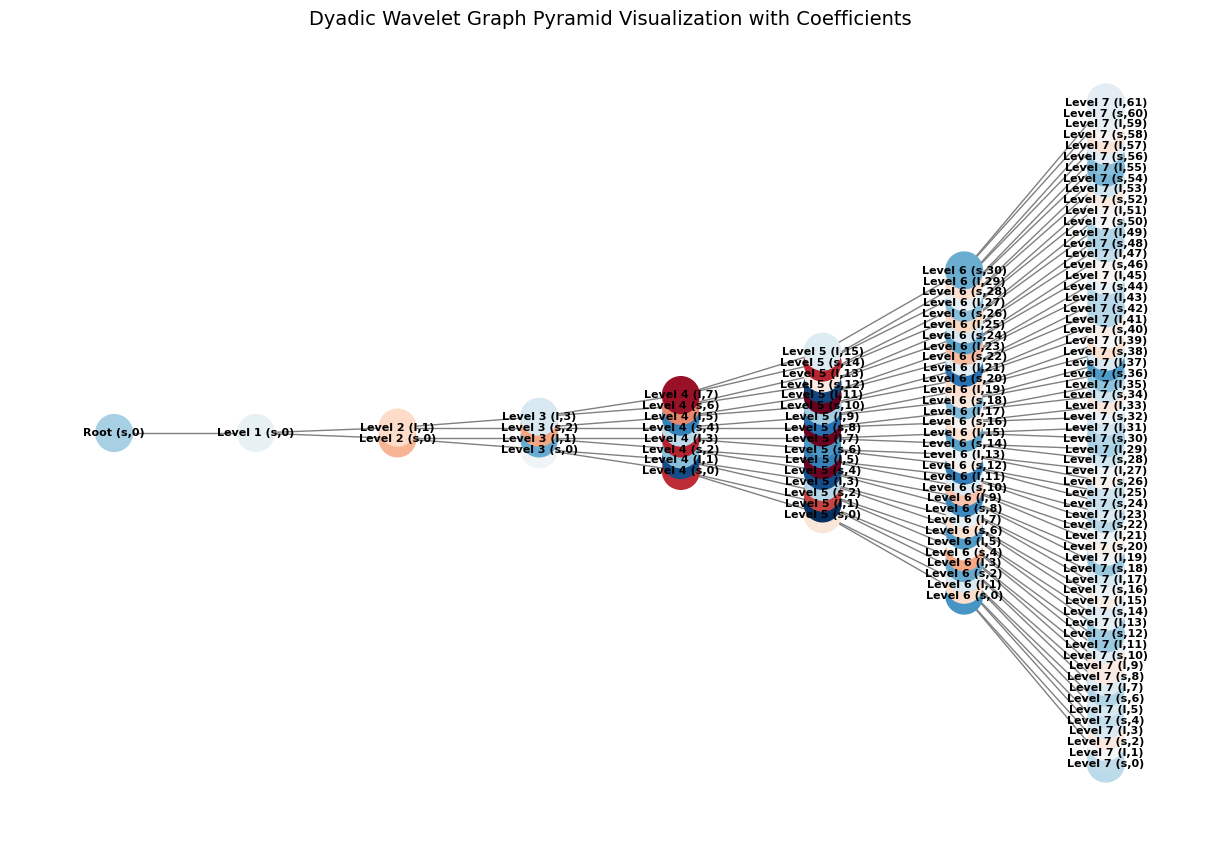

In [36]:
import torch
import networkx as nx
import torch_geometric
from torch_geometric.data import Data
import pywt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Generate a sample signal
np.random.seed(42)
signal = np.sin(2 * np.pi * 10 * np.linspace(0, 1, 124)) + np.random.normal(0, 0.2, 124)

# Perform wavelet decomposition
wavelet = 'db1'
coeffs = pywt.wavedec(signal, wavelet, level=7)

# Prepare graph data
def build_dyadic_wavelet_graph(coeffs):
    """
    Build a dyadic graph from wavelet decomposition coefficients.
    Each node at level n is connected to two nodes at level n+1.
    Add coefficient indices for detailed representation.
    """
    max_length = max(len(c) for c in coeffs)  # Determine max length of coefficient arrays
    node_features = []  # To store node features
    edges = []  # To store edges
    node_labels = {}  # To label nodes for visualization
    node_levels = {}  # To store levels for layout
    node_coefficients = {}  # To store wavelet coefficients for color mapping

    current_node = 0  # Node counter

    # Add root node (original signal approximation)
    root_feature = np.pad(coeffs[0], (0, max_length - len(coeffs[0])), mode='constant')
    node_features.append(root_feature.tolist())
    node_labels[current_node] = "Root (s,0)"
    node_levels[current_node] = 0
    node_coefficients[current_node] = coeffs[0][0]  # Use the first coefficient of the root

    parent_nodes = [current_node]  # Track parent nodes for dyadic connections
    current_node += 1

    # Process detail coefficients for wavelet levels
    for level, c in enumerate(coeffs[1:], start=1):
        new_parent_nodes = []  # Track new parent nodes for the next level
        for parent in parent_nodes:
            # Each parent connects to two children
            for i in range(2):
                if len(c) > 2 * (parent - parent_nodes[0]) + i:  # Check if index is within bounds
                    coeff_index = 2 * (parent - parent_nodes[0]) + i
                    padded_feature = np.pad([c[coeff_index]],
                                            (0, max_length - 1), mode='constant')
                    node_features.append(padded_feature.tolist())
                    s_or_l = "s" if i == 0 else "l"  # Determine short (s) or long (l) connection
                    node_labels[current_node] = f"Level {level} ({s_or_l},{coeff_index})"
                    node_levels[current_node] = level
                    node_coefficients[current_node] = c[coeff_index]  # Store wavelet coefficient
                    edges.append([parent, current_node])  # Add edge
                    new_parent_nodes.append(current_node)
                    current_node += 1
        parent_nodes = new_parent_nodes  # Update parent nodes for next level

    # Convert to PyTorch tensors
    x = torch.tensor(node_features, dtype=torch.float)
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

    return Data(x=x, edge_index=edge_index), node_labels, node_levels, node_coefficients

# Build the dyadic wavelet graph
wavelet_graph, node_labels, node_levels, node_coefficients = build_dyadic_wavelet_graph(coeffs)

# Convert to NetworkX for visualization
g = torch_geometric.utils.to_networkx(wavelet_graph, to_undirected=True)

# Draw the graph with improved visualization
def draw_dyadic_wavelet_graph_pyramid(g, node_labels, node_levels, node_coefficients):
    plt.figure(figsize=(12, 8))
    for node, level in node_levels.items():
        g.nodes[node]['subset'] = level  # Add subset information for each node
    pos = nx.multipartite_layout(g, subset_key='subset')  # Arrange in levels

    # Normalize coefficients for color mapping
    coeff_values = list(node_coefficients.values())
    norm = mcolors.Normalize(vmin=min(coeff_values), vmax=max(coeff_values))
    cmap = plt.cm.RdBu_r  # Red for positive, blue for negative

    node_colors = [cmap(norm(node_coefficients[node])) for node in g.nodes()]

    nx.draw(
        g, pos, with_labels=True, labels=node_labels,
        node_size=700, node_color=node_colors, font_size=8, font_weight="bold", edge_color="gray"
    )
    plt.gca().invert_yaxis()  # Invert Y-axis for top-down pyramid
    plt.title("Dyadic Wavelet Graph Pyramid Visualization with Coefficients", fontsize=14)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(coeff_values) 
    plt.show()

# Visualize the wavelet graph as a pyramid with colored nodes
draw_dyadic_wavelet_graph_pyramid(g, node_labels, node_levels, node_coefficients)


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

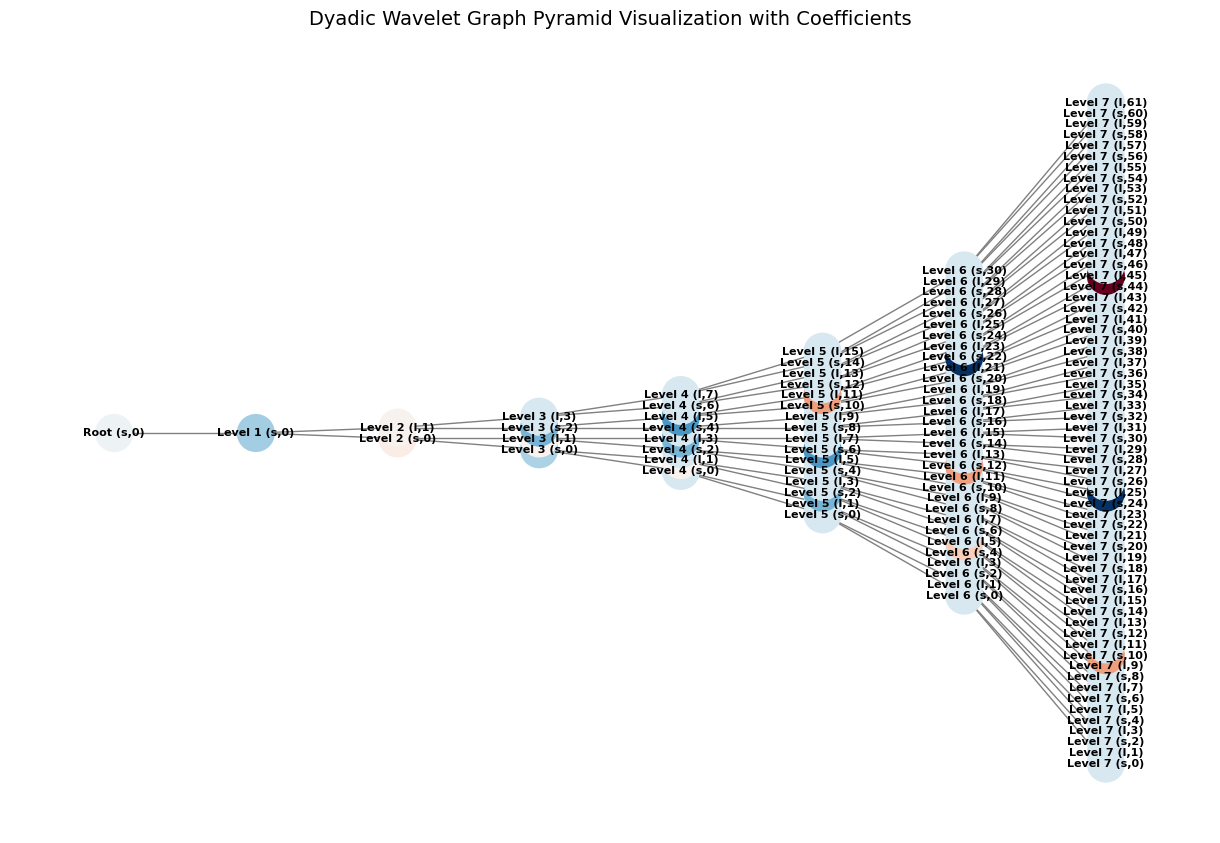

In [38]:
import torch
import networkx as nx
import torch_geometric
from torch_geometric.data import Data
import pywt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Generate a spiked signal (Donoho's example)
def generate_spiked_signal(n, spikes):
    """
    Generate a spiked signal of length n with specific spike locations and magnitudes.
    """
    signal = np.zeros(n)
    for loc, mag in spikes:
        signal[loc] = mag
    return signal

# Example parameters
n = 124
spikes = [(20, 5), (50, -7), (90, 10)]  # Locations and magnitudes of spikes
signal = generate_spiked_signal(n, spikes)

# Perform wavelet decomposition
wavelet = 'db1'
coeffs = pywt.wavedec(signal, wavelet, level=7)

# Prepare graph data
def build_dyadic_wavelet_graph(coeffs):
    """
    Build a dyadic graph from wavelet decomposition coefficients.
    Each node at level n is connected to two nodes at level n+1.
    Add coefficient indices for detailed representation.
    """
    max_length = max(len(c) for c in coeffs)  # Determine max length of coefficient arrays
    node_features = []  # To store node features
    edges = []  # To store edges
    node_labels = {}  # To label nodes for visualization
    node_levels = {}  # To store levels for layout
    node_coefficients = {}  # To store wavelet coefficients for color mapping

    current_node = 0  # Node counter

    # Add root node (original signal approximation)
    root_feature = np.pad(coeffs[0], (0, max_length - len(coeffs[0])), mode='constant')
    node_features.append(root_feature.tolist())
    node_labels[current_node] = "Root (s,0)"
    node_levels[current_node] = 0
    node_coefficients[current_node] = coeffs[0][0]  # Use the first coefficient of the root

    parent_nodes = [current_node]  # Track parent nodes for dyadic connections
    current_node += 1

    # Process detail coefficients for wavelet levels
    for level, c in enumerate(coeffs[1:], start=1):
        new_parent_nodes = []  # Track new parent nodes for the next level
        for parent in parent_nodes:
            # Each parent connects to two children
            for i in range(2):
                if len(c) > 2 * (parent - parent_nodes[0]) + i:  # Check if index is within bounds
                    coeff_index = 2 * (parent - parent_nodes[0]) + i
                    padded_feature = np.pad([c[coeff_index]],
                                            (0, max_length - 1), mode='constant')
                    node_features.append(padded_feature.tolist())
                    s_or_l = "s" if i == 0 else "l"  # Determine short (s) or long (l) connection
                    node_labels[current_node] = f"Level {level} ({s_or_l},{coeff_index})"
                    node_levels[current_node] = level
                    node_coefficients[current_node] = c[coeff_index]  # Store wavelet coefficient
                    edges.append([parent, current_node])  # Add edge
                    new_parent_nodes.append(current_node)
                    current_node += 1
        parent_nodes = new_parent_nodes  # Update parent nodes for next level

    # Convert to PyTorch tensors
    x = torch.tensor(node_features, dtype=torch.float)
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

    return Data(x=x, edge_index=edge_index), node_labels, node_levels, node_coefficients

# Build the dyadic wavelet graph
wavelet_graph, node_labels, node_levels, node_coefficients = build_dyadic_wavelet_graph(coeffs)

# Convert to NetworkX for visualization
g = torch_geometric.utils.to_networkx(wavelet_graph, to_undirected=True)

# Draw the graph with improved visualization
def draw_dyadic_wavelet_graph_pyramid(g, node_labels, node_levels, node_coefficients):
    plt.figure(figsize=(12, 8))
    for node, level in node_levels.items():
        g.nodes[node]['subset'] = level  # Add subset information for each node
    pos = nx.multipartite_layout(g, subset_key='subset')  # Arrange in levels

    # Normalize coefficients for color mapping
    coeff_values = list(node_coefficients.values())
    norm = mcolors.Normalize(vmin=min(coeff_values), vmax=max(coeff_values))
    cmap = plt.cm.RdBu_r  # Red for positive, blue for negative

    node_colors = [cmap(norm(node_coefficients[node])) for node in g.nodes()]

    nx.draw(
        g, pos, with_labels=True, labels=node_labels,
        node_size=700, node_color=node_colors, font_size=8, font_weight="bold", edge_color="gray"
    )
    plt.gca().invert_yaxis()  # Invert Y-axis for top-down pyramid
    plt.title("Dyadic Wavelet Graph Pyramid Visualization with Coefficients", fontsize=14)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(coeff_values)
    plt.colorbar(sm, label="Wavelet Coefficients")
    plt.show()

# Visualize the wavelet graph as a pyramid with colored nodes
draw_dyadic_wavelet_graph_pyramid(g, node_labels, node_levels, node_coefficients)
